<a href="https://colab.research.google.com/github/kristinepetrosyan/Mod4project/blob/master/student_Mod4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Project Submission

Student name: Kristine Petrosyan

Student pace: Part time

Scheduled project review date/time:TBD

Instructor name: Victor Geislinger

Blog post URL: TBD

# Obtain data

In [15]:
# Importing necessary packages and dictionaries

# fundamentals
import os
import matplotlib.pyplot as plt
import numpy as np

# visualization libraries
from PIL import Image
from keras.utils import plot_model
from IPython.display import Image 


# modelling
import keras
import tensorflow as tf
import tensorflow.keras as keras 
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras import models
from keras import utils
from keras.models import Sequential
from keras.losses import binary_crossentropy
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.initializers import glorot_uniform
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras import losses
from keras.layers import (Activation, BatchNormalization, Conv2D, Dense,
                          Dropout, Flatten, MaxPooling2D)

layer = layers.Dense(
    units=64,
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)
)

# preprocessing
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


# callbacks
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# evaluation
from sklearn.metrics import classification_report, confusion_matrix

import itertools 
import functools
import operator
from keras import models
import math 

# Surpress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
d = drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wH_undYlcS0px43ZHuUuDGwl2S0iGl_eyNSjvrQwi-caJPlwsLW-Ts
Mounted at /content/drive


In [16]:
new_dir = "./chest_xray"
print(new_dir)

./chest_xray


In [17]:
train_folder = os.path.join(new_dir, 'train')
test_folder = os.path.join(new_dir, 'test')
val_folder = os.path.join(new_dir, 'val')

In [18]:
# initialize data generator instance which will standardize on the fly as we did previusly
# use 10% of training data as validation set
generator = ImageDataGenerator(rescale=1.0/255.0,
                               validation_split=0.15)

In [19]:
# Get all the data in the directory chest_xrays/test and resize
test_generator = generator.flow_from_directory(
        test_folder, 
        target_size=(64, 64), batch_size = 624, color_mode='grayscale', shuffle=True) 

# get all the data in the directory split/validation (782 images), and reshape them
val_generator = generator.flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size = 782, color_mode='grayscale',  shuffle=True,  subset='validation')

# get all the data in the directory split/train (4434 images), and reshape them
train_generator = generator.flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size=4434, color_mode='grayscale',  shuffle=True,  subset='training')


Found 624 images belonging to 2 classes.
Found 782 images belonging to 2 classes.
Found 4434 images belonging to 2 classes.


In [20]:
# create the data sets
train_images_new, train_labels_new = next(train_generator)
#print(train_images_new)

In [21]:
val_images, val_labels = next(val_generator)


In [22]:
test_images_new, test_labels_new = next(test_generator)

In [ ]:
from joblib import dump, load
data = range(100)
dump(data, 'data_file.joblib') 

['data_file.joblib']

In [23]:
# Exploring the dataset
m_train = train_images_new.shape[0]
num_px = train_images_new.shape[1]
m_test = test_images_new.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images_new.shape))
print ("train_labels shape: " + str(train_labels_new.shape))
print ("test_images shape: " + str(test_images_new.shape))
print ("test_labels shape: " + str(test_labels_new.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 4434
Number of testing samples: 624
Number of validation samples: 782
train_images shape: (4434, 64, 64, 1)
train_labels shape: (4434, 2)
test_images shape: (624, 64, 64, 1)
test_labels shape: (624, 2)
val_images shape: (782, 64, 64, 1)
val_labels shape: (782, 2)


TypeError: Invalid shape (64, 64, 1) for image data

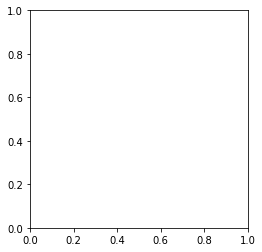

In [42]:
# Sample image
sample_image = train_images_new[0]
sample_label =train_labels_new[0]
display(plt.imshow(sample_image));
print('Label: {}'.format(sample_label))

In [32]:

# rescaled image
sample_image

array([[[0.1254902 ],
        [0.14117648],
        [0.16470589],
        ...,
        [0.22352943],
        [0.15686275],
        [0.14901961]],

       [[0.13333334],
        [0.14901961],
        [0.18431373],
        ...,
        [0.23137257],
        [0.19607845],
        [0.18431373]],

       [[0.12941177],
        [0.20392159],
        [0.227451  ],
        ...,
        [0.24705884],
        [0.23529413],
        [0.13725491]],

       ...,

       [[0.08235294],
        [0.07450981],
        [0.05882353],
        ...,
        [0.07450981],
        [0.07450981],
        [0.07058824]],

       [[0.08235294],
        [0.07450981],
        [0.06666667],
        ...,
        [0.07058824],
        [0.07058824],
        [0.13725491]],

       [[0.08235294],
        [0.07450981],
        [0.05882353],
        ...,
        [0.06666667],
        [0.08627451],
        [0.1764706 ]]], dtype=float32)

In [33]:
# reshaping the images for test, train and validation sets
train_img = train_images_new.reshape(train_images_new.shape[0], -1)
test_img = test_images_new.reshape(test_images_new.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(4434, 4096)
(624, 4096)
(782, 4096)


In [36]:
# reshaping labels
train_y = np.reshape((train_labels_new[:,0]), (4434,1))
test_y = np.reshape(test_labels_new[:,0], (624,1))
val_y = np.reshape(val_labels[:,0], (782,1))

#Baseline model

In [ ]:
# creating a baseline two layers model
np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(12288,))) 
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# defining the optimizer and the learning rate
optimizer = keras.optimizers.Adam(lr=0.00001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False)
# compile the model
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                122890    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 122,951
Trainable params: 122,951
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fitting the model
history = model.fit(train_img,
                    train_y,
                    epochs=60,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/60
139/139 [==============================] - 1s 4ms/step - loss: 0.7059 - accuracy: 0.6698 - val_loss: 0.6004 - val_accuracy: 0.7430
Epoch 2/60
139/139 [==============================] - 1s 4ms/step - loss: 0.5297 - accuracy: 0.7429 - val_loss: 0.5014 - val_accuracy: 0.7430
Epoch 3/60
139/139 [==============================] - 1s 4ms/step - loss: 0.4673 - accuracy: 0.7526 - val_loss: 0.4618 - val_accuracy: 0.7570
Epoch 4/60
139/139 [==============================] - 0s 4ms/step - loss: 0.4233 - accuracy: 0.7927 - val_loss: 0.4319 - val_accuracy: 0.7992
Epoch 5/60
139/139 [==============================] - 1s 4ms/step - loss: 0.3902 - accuracy: 0.8360 - val_loss: 0.4076 - val_accuracy: 0.8095
Epoch 6/60
139/139 [==============================] - 1s 4ms/step - loss: 0.3626 - accuracy: 0.8606 - val_loss: 0.3933 - val_accuracy: 0.8043
Epoch 7/60
139/139 [==============================] - 0s 4ms/step - loss: 0.3417 - accuracy: 0.8728 - val_loss: 0.3739 - val_accuracy: 0.8286
Epoch 

In [ ]:
results_train = model.evaluate(train_img, train_y)

139/139 [==============================] - 0s 3ms/step - loss: 0.1311 - accuracy: 0.9551


In [ ]:
results_test = model.evaluate(test_img, test_y)

20/20 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.7692


In [ ]:
results_train


[0.17221787571907043, 0.9463238716125488]

In [ ]:
results_test

[0.454438716173172, 0.7692307829856873]

In [ ]:
# classification report
y_pred = model.predict(test_img)
y_pred = np.rint(y_pred)

print(classification_report(test_y, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       390
           1       0.95      0.41      0.57       234

    accuracy                           0.77       624
   macro avg       0.84      0.70      0.71       624
weighted avg       0.82      0.77      0.74       624



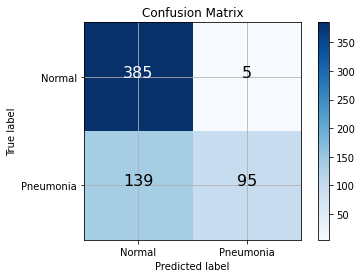

In [ ]:
# confusion matrix
class_names = ['Normal','Pneumonia']

y_pred = model.predict(test_img)
y_pred = np.rint(y_pred)
    
plt.grid(b=None)
cmap=plt.cm.Blues  
cnf_matrix = confusion_matrix(test_y, y_pred)
plt.imshow(cnf_matrix, cmap=cmap) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
    
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 fontsize=16,
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

    
plt.colorbar()
plt.show()

In [ ]:
def visualize_training_results(results):
        history = results.history
        plt.figure()
        plt.plot(history['val_loss'])
        plt.plot(history['loss'])
        plt.legend(['val_loss', 'loss'])
        plt.title('Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
    
        plt.figure()
        plt.plot(history['val_accuracy'])
        plt.plot(history['accuracy'])
        plt.legend(['val_accuracy', 'accuracy'])
        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.show()

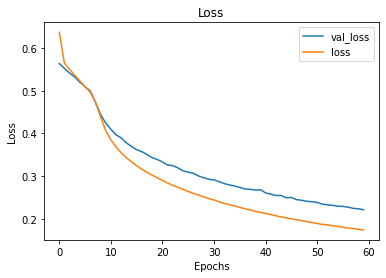

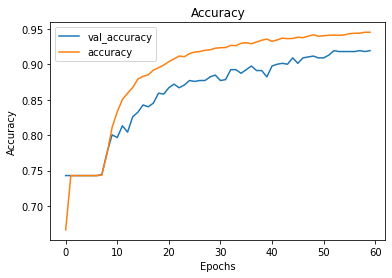

In [ ]:
visualize_training_results(history)


# Regularization with dropout

In [ ]:
model = models.Sequential()
# Implement dropout to the input layer
# NOTE: This is where you define the number of units in the input layer
model.add(layers.Dropout(0.3, input_shape=(12288,)))

# Add the first hidden layer
model.add(layers.Dense(16, activation='relu'))

# Implement dropout to the first hidden layer 
model.add(layers.Dropout(0.3))

# Add the second hidden layer
model.add(layers.Dense(10, activation='relu'))

# Implement dropout to the second hidden layer 
model.add(layers.Dropout(0.3))


# Add the output layer
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.Adam(lr=0.00001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_3 (Dropout)          (None, 12288)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                196624    
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                170       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 196,805
Trainable params: 196,805
Non-trainable params: 0
________________________________________________

In [ ]:
history = model.fit(train_img,
                    train_y,
                    epochs=80,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/80
139/139 [==============================] - 1s 10ms/step - loss: 0.6508 - accuracy: 0.6227 - val_loss: 0.5431 - val_accuracy: 0.7430
Epoch 2/80
139/139 [==============================] - 1s 9ms/step - loss: 0.5981 - accuracy: 0.6728 - val_loss: 0.5221 - val_accuracy: 0.7430
Epoch 3/80
139/139 [==============================] - 1s 9ms/step - loss: 0.5827 - accuracy: 0.6730 - val_loss: 0.4949 - val_accuracy: 0.7442
Epoch 4/80
139/139 [==============================] - 1s 9ms/step - loss: 0.5473 - accuracy: 0.6978 - val_loss: 0.4505 - val_accuracy: 0.7724
Epoch 5/80
139/139 [==============================] - 1s 9ms/step - loss: 0.5212 - accuracy: 0.7219 - val_loss: 0.4189 - val_accuracy: 0.8133
Epoch 6/80
139/139 [==============================] - 1s 9ms/step - loss: 0.5057 - accuracy: 0.7388 - val_loss: 0.4031 - val_accuracy: 0.8261
Epoch 7/80
139/139 [==============================] - 1s 9ms/step - loss: 0.4687 - accuracy: 0.7652 - val_loss: 0.3821 - val_accuracy: 0.8363
Epoch

In [ ]:
# evaluating results
results_train = model.evaluate(train_img, train_y)
results_test = model.evaluate(test_img, test_y)
print(results_train)
print(results_test)

20/20 [==============================] - 0s 2ms/step - loss: 0.5729 - accuracy: 0.7708
[0.13057808578014374, 0.95692378282547]
[0.5728743076324463, 0.7708333134651184]


In [ ]:
# classification report
y_pred = model.predict(test_img)
y_pred = np.rint(y_pred)

print(classification_report(test_y, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.74      0.99      0.84       390
           1       0.95      0.41      0.57       234

    accuracy                           0.77       624
   macro avg       0.84      0.70      0.71       624
weighted avg       0.82      0.77      0.74       624



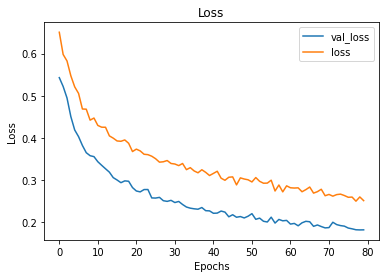

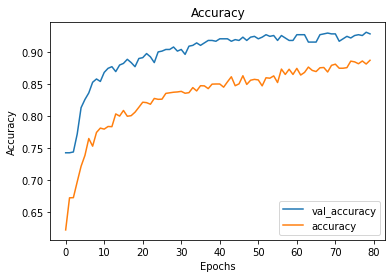

In [ ]:
visualize_training_results(history)


# CNN model

In [ ]:
# creating a basic CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])


model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)             

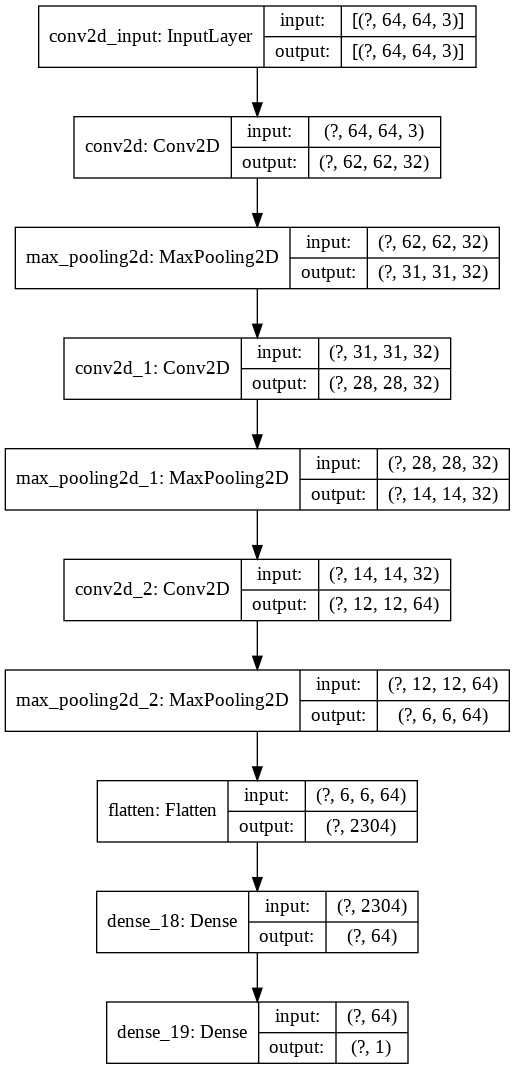

In [ ]:
# displaying the layers
from keras.utils import plot_model
from IPython.display import Image 

file_name = 'cnn1_model.png'
plot_model(model, show_shapes=True, show_layer_names=True, to_file=file_name)
Image(file_name)

In [ ]:
# fitting the model
history = model.fit(train_images_new,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Epoch 1/30
139/139 [==============================] - 26s 184ms/step - loss: 0.5846 - acc: 0.7400 - val_loss: 0.5565 - val_acc: 0.7430
Epoch 2/30
139/139 [==============================] - 25s 183ms/step - loss: 0.5350 - acc: 0.7429 - val_loss: 0.5023 - val_acc: 0.7430
Epoch 3/30
139/139 [==============================] - 26s 185ms/step - loss: 0.4734 - acc: 0.7458 - val_loss: 0.4417 - val_acc: 0.7494
Epoch 4/30
139/139 [==============================] - 26s 184ms/step - loss: 0.4103 - acc: 0.7963 - val_loss: 0.3893 - val_acc: 0.8299
Epoch 5/30
139/139 [==============================] - 26s 184ms/step - loss: 0.3563 - acc: 0.8557 - val_loss: 0.3458 - val_acc: 0.8453
Epoch 6/30
139/139 [==============================] - 26s 184ms/step - loss: 0.3202 - acc: 0.8798 - val_loss: 0.3210 - val_acc: 0.8606
Epoch 7/30
139/139 [==============================] - 26s 185ms/step - loss: 0.2922 - acc: 0.8895 - val_loss: 0.3072 - val_acc: 0.8619
Epoch 8/30
139/139 [==============================] - 2

In [ ]:
# evaluating the results
results_train = model.evaluate(train_images_new, train_y)
results_test = model.evaluate(test_images_new, test_y)
print(results_train)
print(results_test)

20/20 [==============================] - 1s 46ms/step - loss: 0.4204 - acc: 0.8157
[0.1403011828660965, 0.9490302205085754]
[0.42035993933677673, 0.8157051205635071]


In [ ]:
# classification report
y_pred = model.predict(test_images_new)
y_pred = np.rint(y_pred)

print(classification_report(test_y, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       390
           1       0.95      0.53      0.68       234

    accuracy                           0.82       624
   macro avg       0.87      0.76      0.78       624
weighted avg       0.84      0.82      0.80       624



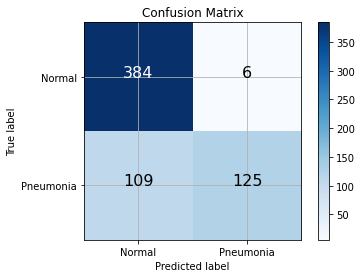

In [ ]:
# confusion matrix
import matplotlib.pyplot as plt


class_names = ['Normal','Pneumonia']

y_pred = model.predict(test_images_new)
y_pred = np.rint(y_pred)
    
plt.grid(b=None)
cmap=plt.cm.Blues  
cnf_matrix = confusion_matrix(test_y, y_pred)
plt.imshow(cnf_matrix, cmap=cmap) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
    
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 fontsize=16,
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

    
plt.colorbar()
plt.show()

In [ ]:
# visualizing training results
def visualize_training_results(results):
        history = results.history
        plt.figure()
        plt.plot(history['val_loss'])
        plt.plot(history['loss'])
        plt.legend(['val_loss', 'loss'])
        plt.title('Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
    
        plt.figure()
        plt.plot(history['val_accuracy'])
        plt.plot(history['accuracy'])
        plt.legend(['val_accuracy', 'accuracy'])
        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.show()

visualize_training_results(history)

# CNN model 2


In [ ]:
# rescaling and re-defining the size of the data
SEED = 1234
batch_size = 64
v_batch_size = 64
input_size = (32, 32)
input_shape = input_size + (3, )

# generator = ImageDataGenerator(rescale=1.0/255.0,
#                                validation_split=0.15)

train_generator = generator.flow_from_directory(
    train_folder,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='binary', subset='training')

validation_generator = generator.flow_from_directory(
    train_folder,
    target_size=input_size,
    batch_size=v_batch_size,
    class_mode='binary', subset='validation')

Found 4434 images belonging to 2 classes.
Found 782 images belonging to 2 classes.


In [ ]:
# Creating a deeply connected cnn model

model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=input_shape, kernel_initializer=glorot_uniform(seed=SEED)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.01), kernel_initializer=glorot_uniform(seed=SEED)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.01), kernel_initializer=glorot_uniform(seed=SEED)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(rate=0.3, seed=SEED))

model.add(Flatten())
model.add(Dense(450, kernel_regularizer=tf.keras.regularizers.l2(0.01), kernel_initializer=glorot_uniform(seed=SEED)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid', kernel_initializer=glorot_uniform(seed=SEED)))

model.compile(optimizer=SGD(lr=0.01, nesterov=True),
              loss=binary_crossentropy,
              metrics=['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 30, 30, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)       

In [ ]:
# Defining callbacks
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    mode='auto',
    min_lr=0.0001)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    mode='auto')
model_checkpoint = ModelCheckpoint(
    filepath='weights.h5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='auto')

In [ ]:
# Fitting the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=50,
    shuffle=False,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // v_batch_size,
    callbacks=[reduce_lr, early_stopping, model_checkpoint])


model.load_weights('weights.h5')
model.save('pneumonia-chest-x-ray-cnn.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
69/69 [==============================] - ETA: 0s - loss: 4.1878 - accuracy: 0.8641
Epoch 00001: val_loss improved from inf to 4.44096, saving model to weights.h5
69/69 [==============================] - 53s 771ms/step - loss: 4.1878 - accuracy: 0.8641 - val_loss: 4.4410 - val_accuracy: 0.7409
Epoch 2/50
69/69 [==============================] - ETA: 0s - loss: 3.9605 - accuracy: 0.9201
Epoch 00002: val_loss did not improve from 4.44096
69/69 [==============================] - 53s 762ms/step - loss: 3.9605 - accuracy: 0.9201 - val_loss: 4.6270 - val_accuracy: 0.7435
Epoch 3/50
69/69 [==============================] - ETA: 0s - loss: 3.8267 - accuracy: 0.9343
Epoch 00003: val_loss did not improve from 4.44096
69/69 [==============================] - 53s 762ms/step - loss: 3.8267 - accuracy: 0.9343 - val_loss: 4.6733 - val_accuracy: 0.7435
Epoch 4/50
69/69 [==============================] - ETA: 0s - los

In [ ]:
# Predict classes for test images 
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=input_size,
    shuffle=False,
    batch_size=v_batch_size,
    class_mode='binary')
cnn_test_score = model.evaluate_generator(
    test_generator,
    steps=test_generator.n // v_batch_size)

print("Test set:\n loss: %.4f, accuracy: %.4f" %
      (cnn_test_score[0], cnn_test_score[1]))

Found 624 images belonging to 2 classes.
Test set:
 loss: 2.8876, accuracy: 0.7240


In [ ]:
# printing Classification report
y_true=test_generator.classes

y_pred = model.predict_generator(test_generator)
y_pred = np.rint(y_pred)

print(classification_report(y_true, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.32      0.49       234
           1       0.71      1.00      0.83       390

    accuracy                           0.75       624
   macro avg       0.85      0.66      0.66       624
weighted avg       0.81      0.75      0.70       624



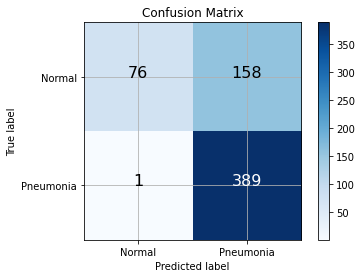

In [ ]:
# creating confusion matrix
class_names = ['Normal','Pneumonia']

y_true=test_generator.classes
y_pred = model.predict_generator(test_generator)
y_pred = np.rint(y_pred)
    
plt.grid(b=None)
cmap=plt.cm.Blues  
cnf_matrix = confusion_matrix(y_true, y_pred)
plt.imshow(cnf_matrix, cmap=cmap) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
    
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 fontsize=16,
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

    
plt.colorbar()
plt.show()

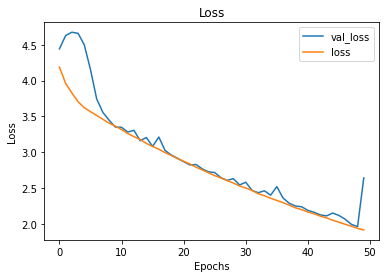

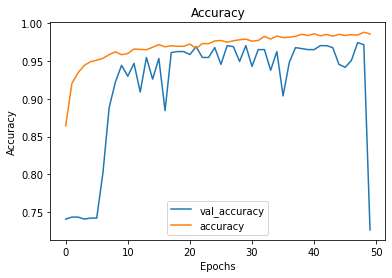

In [ ]:
# visualizing training results
def visualize_training_results(results):
        history = results.history
        plt.figure()
        plt.plot(history['val_loss'])
        plt.plot(history['loss'])
        plt.legend(['val_loss', 'loss'])
        plt.title('Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
    
        plt.figure()
        plt.plot(history['val_accuracy'])
        plt.plot(history['accuracy'])
        plt.legend(['val_accuracy', 'accuracy'])
        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.show()

visualize_training_results(history)

In [ ]:
# Extract model layer outputs
layer_outputs = [layer.output for layer in model.layers[:8]]

# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

(1, 32, 32, 3)


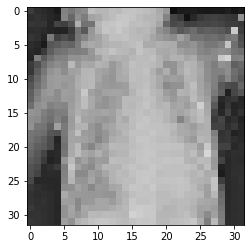

In [ ]:
img_path = '/content/drive/My Drive/Kaggle/chest_xray/train/PNEUMONIA/person1008_bacteria_2939.jpeg'


from keras.preprocessing import image
# Assign the first image to a keras image object
img = image.load_img(img_path, target_size=(32, 32))
# Create a tensor of the images pixel values
img_tensor = image.img_to_array(img)
# Alter the dimentionality of the array to that of a tensor
img_tensor = np.expand_dims(img_tensor, axis=0)

#Follow the Original Model Preprocessing
img_tensor /= 255.

#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]

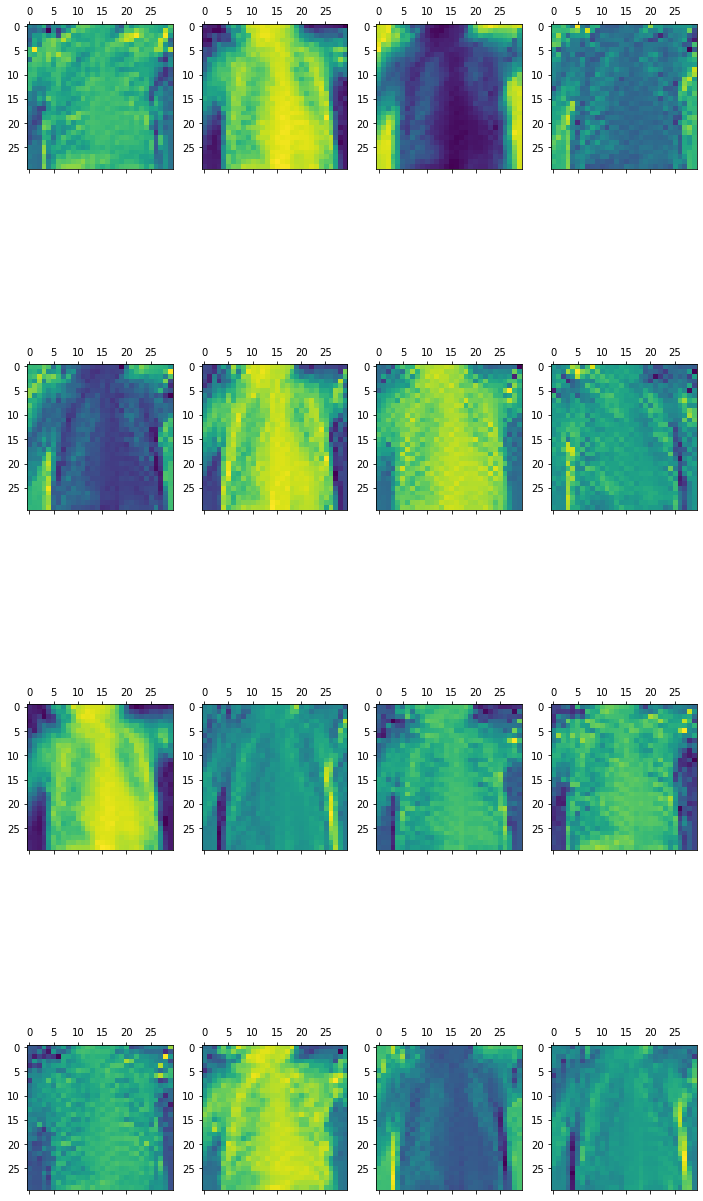

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(12,24))
for i in range(16):
    row = i//4
    column = i%4
    ax = axes[row, column]
    first_layer_activation = activations[0]
    ax.matshow(first_layer_activation[0, :, :, i], cmap='viridis')

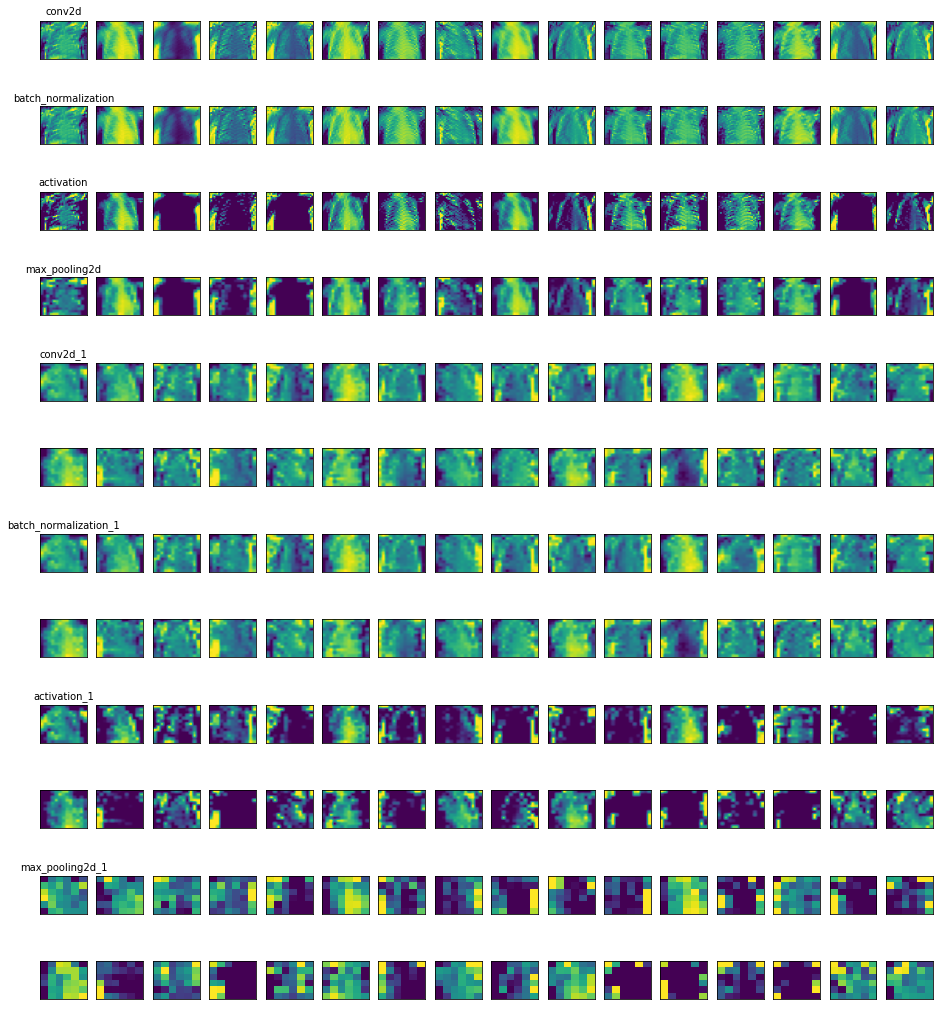

In [ ]:
# Extract model layer outputs
layer_outputs = [layer.output for layer in model.layers[:8]]

# Create a model for displaying the feature maps
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

# Extract Layer Names for Labelling
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

total_features = sum([a.shape[-1] for a in activations])
total_features

n_cols = 16
n_rows = math.ceil(total_features / n_cols)


iteration = 0
fig , axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols, n_rows*1.5))

for layer_n, layer_activation in enumerate(activations):
    n_channels = layer_activation.shape[-1]
    for ch_idx in range(n_channels):
        row = iteration // n_cols
        column = iteration % n_cols
    
        ax = axes[row, column]

        channel_image = layer_activation[0,
                                         :, :,
                                         ch_idx]
        # Post-process the feature to make it visually palatable
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')

        ax.imshow(channel_image, aspect='auto', cmap='viridis')
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        
        if ch_idx == 0:
            ax.set_title(layer_names[layer_n], fontsize=10)
        iteration += 1

fig.subplots_adjust(hspace=1.25)
plt.savefig('Intermediate_Activations_Visualized.pdf')
plt.show()

# Transfer learning

To increase our recall and accuracy rates, pre-trained models Xception and VGG16 will be used with feature extraction. Feature extraction is an important component of a pattern recognition system which identifies key features in the data. Feature extraction transforms input parameter vector into a feature vector and/or reducing its dimensionality.

## Xception Model

In [44]:
#Defining a model distionary for Xception

model_dict = {}
model_name = "Xception"
input_size = (299, 299)
features_dim = [10, 10, 2048]

model_dict['object'] = Xception
model_dict['input_size'] = input_size
model_dict['input_shape'] = input_size + (3, )
model_dict['features_dim'] = features_dim
model_dict['dense_input_dim'] = functools.reduce(operator.mul, features_dim, 1)
model_dict['weights_filename'] = model_name.lower() + '_weights.h5'
model_dict['model_filename'] = 'pneumonia-chest-x-ray-' + model_name.lower() + '.h5'
model_dict['batch_size'] = 128

In [45]:

n_train = train_img.shape[0]
n_test = test_img.shape[0]
n_val = val_img.shape[0]



In [47]:
# Rescaling 
datagen = ImageDataGenerator(rescale=1. / 255)

# Definig a function for feature extraction
def extract_features(model_dict, directory, sample_count):
    
    batch_size = model_dict['batch_size']
    shape = tuple([sample_count] + model_dict['features_dim'])
    features = np.zeros(shape=shape)
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=model_dict['input_size'],
        batch_size=batch_size,
        class_mode='binary')
    
    base_model = model_dict['object'](
        input_shape=model_dict['input_shape'],
        weights='imagenet',
        include_top=False)
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = base_model.predict(inputs_batch)
        features[i * batch_size:(i + 1) * batch_size] = features_batch
        labels[i * batch_size:(i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels



In [49]:
# Feature extraction
train_features, train_labels = extract_features(model_dict, train_folder, n_train)
validation_features, validation_labels = extract_features(model_dict, val_folder, n_val)
test_features, test_labels = extract_features(model_dict, test_folder, n_test)

MemoryError: Unable to allocate 6.77 GiB for an array with shape (4434, 10, 10, 2048) and data type float64

In [ ]:
# Reshape the data
train_features = np.reshape(train_features, (n_train, model_dict['dense_input_dim']))
validation_features = np.reshape(validation_features, (n_val, model_dict['dense_input_dim']))
test_features = np.reshape(test_features, (n_test, model_dict['dense_input_dim']))

In [ ]:
train_features = np.reshape(train_features, (n_train, model_dict['dense_input_dim']))
validation_features = np.reshape(validation_features, (n_val, model_dict['dense_input_dim']))
test_features = np.reshape(test_features, (n_test, model_dict['dense_input_dim']))

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=model_dict['dense_input_dim']))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer=Adam(lr=0.00001),
    loss=binary_crossentropy,
    metrics=['accuracy'])

model.summary()

In [ ]:
model_checkpoint = ModelCheckpoint(
    filepath=model_dict['weights_filename'],
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='auto')

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    mode='auto')

In [ ]:
history = model.fit(
    train_features,
    train_labels,
    epochs=50,
    batch_size=model_dict['batch_size'],
    validation_data=(validation_features, validation_labels),
    callbacks=[early_stopping, model_checkpoint])
model.load_weights(model_dict['weights_filename'])
model.save(model_dict['model_filename'])

In [ ]:
# Get numerical predictions for test set images 
predictions = model.predict(
    test_features,
    batch_size= n_test // t_batch_size)

# True and predicted labels 
pred_labels = [1 if p > 0.5 else 0 for p in predictions.ravel()]

# Classification metrics
print(classification_report(
        test_labels,
        pred_labels,
        target_names=['normal', 'pneumonia']))

In [ ]:
import matplotlib.pyplot as plt


class_names = ['Normal','Pneumonia']

    
plt.grid(b=None)
cmap=plt.cm.Blues  
cnf_matrix = confusion_matrix(test_labels, pred_labels)
plt.imshow(cnf_matrix, cmap=cmap) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
    
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 fontsize=16,
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

    
plt.colorbar()
plt.show()

In [ ]:
visualize_training_results(history)
